![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Compare SSH, gradients and Laplacian pdf in Gulf Stream</center></h1></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [4]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import scipy.signal as sig


from src import mod_plot
from src import mod_switchvar
from src import mod_spectral
from src.dict_regions_info import *

In [5]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py

denoising_name = 'Gomez_v1'

len_seg = 250 # in num_lines point (i.e. every 2km)

<div class="alert alert-info" role="alert">

<h2>A - 1 day orbit </h2>

</div>
 

In [6]:
path_data = '../denoised_data/swot_1j_share_GS_gomezfilt.nc'

orbit = '1d'

ds_SWOT = xr.open_mfdataset(path_data)
  

## Compute psd for SSH

In [7]:
%%time  

name_var = 'ssha_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'ssha_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'ssha_gomezfilt'
ssh_denoised_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)
wavenum, psd_denoised = sig.welch(np.ravel(ssh_denoised_segs),0.5,nperseg=len_seg,noverlap=0)

wavenum, psd_new_editing, psd_denoised_unet, psd_denoised = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1], psd_denoised[:-1] 


Number of segs 1461 of size 250
Number of segs 1457 of size 250
Number of segs 1461 of size 250
CPU times: user 23.7 s, sys: 818 ms, total: 24.6 s
Wall time: 29.4 s


## Plot psd for SSH

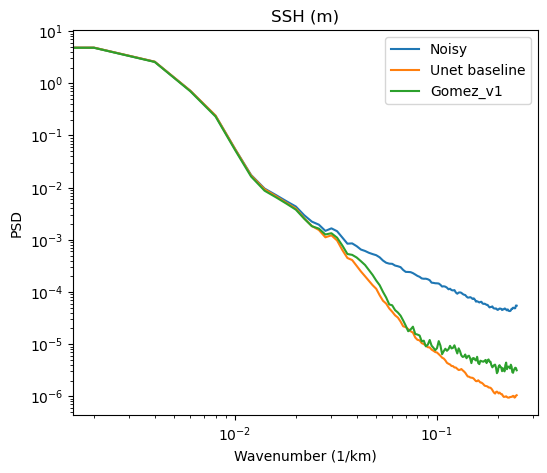

In [9]:
plt.figure(figsize=(6,5))
plt.title('SSH (m)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label='Unet baseline')
plt.loglog(wavenum,psd_denoised,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_compare_'+region_info['name']+'_'+orbit+'_ssh.png')

plt.show()



## Compute SSH gradients and Laplacian

In [10]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)
grad_denoised, lapl_denoised = mod_switchvar.deriv1and2(ds_SWOT.ssha_gomezfilt)


ds_SWOT = ds_SWOT.assign(grad_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + grad_new_editing)
ds_SWOT = ds_SWOT.assign(grad_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + grad_denoised_unet)
ds_SWOT = ds_SWOT.assign(grad_denoised=lambda ds_SWOT: ds_SWOT.ssha_gomezfilt * 0 + grad_denoised)

ds_SWOT = ds_SWOT.assign(lapl_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + lapl_new_editing)
ds_SWOT = ds_SWOT.assign(lapl_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + lapl_denoised_unet)
ds_SWOT = ds_SWOT.assign(lapl_denoised=lambda ds_SWOT: ds_SWOT.ssha_gomezfilt * 0 + lapl_denoised)


## Compute psd for gradients

In [11]:
%%time  

name_var = 'grad_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'grad_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'grad_denoised'
ssh_denoised_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)
wavenum, psd_denoised = sig.welch(np.ravel(ssh_denoised_segs),0.5,nperseg=len_seg,noverlap=0)

wavenum, psd_new_editing, psd_denoised_unet, psd_denoised = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1], psd_denoised[:-1] 


Number of segs 1461 of size 250
Number of segs 1457 of size 250
Number of segs 1461 of size 250
CPU times: user 24.9 s, sys: 651 ms, total: 25.6 s
Wall time: 33.6 s


## Plot psd for gradients

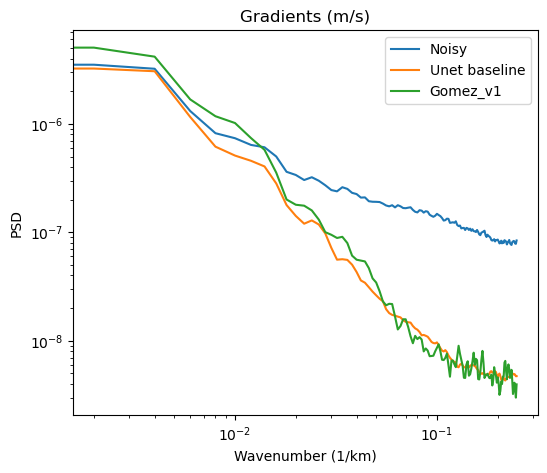

In [12]:
plt.figure(figsize=(6,5))
plt.title('Gradients (m/s)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label='Unet baseline')
plt.loglog(wavenum,psd_denoised,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_compare_'+region_info['name']+'_'+orbit+'_grad.png')

plt.show()



## Compute psd for Laplacians

In [13]:
%%time  

name_var = 'lapl_new_editing'
ssh_new_editing_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'lapl_denoised_unet'
ssh_denoised_unet_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

name_var = 'lapl_denoised'
ssh_denoised_segs = mod_spectral.retrieve_segments(ds_SWOT, name_var, len_seg)

wavenum, psd_new_editing = sig.welch(np.ravel(ssh_new_editing_segs),0.5,nperseg=len_seg,noverlap=0) 
wavenum, psd_denoised_unet = sig.welch(np.ravel(ssh_denoised_unet_segs),0.5,nperseg=len_seg,noverlap=0)
wavenum, psd_denoised = sig.welch(np.ravel(ssh_denoised_segs),0.5,nperseg=len_seg,noverlap=0)



wavenum, psd_new_editing, psd_denoised_unet, psd_denoised = wavenum[:-1], psd_new_editing[:-1], psd_denoised_unet[:-1], psd_denoised[:-1] 

Number of segs 1154 of size 250
Number of segs 1150 of size 250
Number of segs 1154 of size 250
CPU times: user 22.5 s, sys: 595 ms, total: 23.1 s
Wall time: 32.3 s


## Plot psd for Laplacians

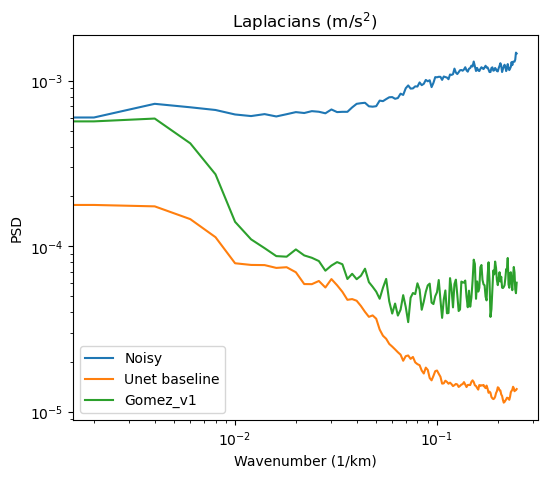

In [14]:
plt.figure(figsize=(6,5))
plt.title('Laplacians (m/s$^2$)')
plt.loglog(wavenum,psd_new_editing,label='Noisy')
plt.loglog(wavenum,psd_denoised_unet,label='Unet baseline')
plt.loglog(wavenum,psd_denoised,label=denoising_name)
plt.xlabel('Wavenumber (1/km)')
plt.ylabel('PSD')
plt.legend()
plt.savefig('../figures/psd_compare_'+region_info['name']+'_'+orbit+'_lapl.png')

plt.show()

